# Sign Language Recognition with MNIST Sign Language Dataset

In this notebook, several Support Vector Machines (SVM) with differenc regularization parameter C and kernel types (such as linear,polynomial, and, radial) are constructed and trained on MNIST Sign Language Dataset [1] to recognize sign language letters. The dataset includes 27455 and 7172 rows for training and testing respectively. Each row stores a vector of 784 pixels that represent 784 gray scale pixels of the immage in a flattened fashion.

[1] https://www.kaggle.com/datamunge/sign-language-mnist?select=sign_mnist_train.

### Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import datetime
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

### Reading the Data

In [23]:
train_df = pd.read_csv("sign_mnist_train.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [20]:
test_df = pd.read_csv("sign_mnist_test.csv")
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [4]:
categories = train_df["label"].unique()
categories.sort()
categories.shape

(24,)

### Class Distribution

Here we check the histogram to get an idea about the class distribution.

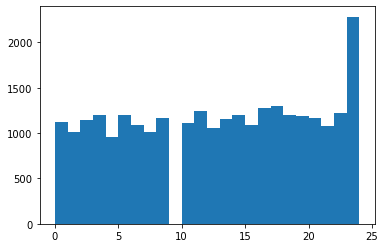

In [5]:
histo = plt.hist(train_df["label"],bins=24)
plt.show()

In [6]:
histo[0].mean(), histo[0].std(), histo[0].max(), histo[0].min()

(1143.9583333333333, 339.36588897121385, 2282.0, 0.0)

### Chi-Square Test to Check Uniformity of the Class Distribution

#### To see if the uniformity of the class distribution is *STATISTICALLY SIGNIFICANT* we apply a Chi-Square test on the data.

H0: The class distribution in the dataset is uniform. (i.e. uniformity is statistically significant.)

Ha: The class distribution in the dataset is not uniform. (i.e. uniformity is not statistically significant.)

In [7]:
from scipy.stats import chisquare, chi2

unique_labels, counts = np.unique(train_df["label"], return_counts = True)
expected_freq = train_df["label"].shape[0]/unique_labels.shape[0]

chi_0 = chisquare(counts,expected_freq)
chi_0025_n = chi2.ppf(1 - .05, df = train_df.shape[0] - 1)
print("Chi_0:", chi_0)
print("Chi_0025_n:", chi_0025_n) 

Chi_0: Power_divergenceResult(statistic=141.05142961209253, pvalue=5.915437888204953e-19)
Chi_0025_n: 27840.563279483347


Since chi_0 is smaller than chi_0025_n we failed to reject our null hypothesis. The class distribution in the dataset is uniform with *0.95* confidence.

### Preprocessing the Data

### MinMax Scaling

In the below cells, train and test data are MinMax scaled and shuffled simultaneously to avoid class imbalances in different regions of the training set.

In [24]:
from sklearn.preprocessing import MinMaxScaler
train_df = train_df.sample(frac=1)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(train_df.iloc[:,1:])
y_train = train_df.iloc[:,0]

In [25]:
test_df = test_df.sample(frac=1)
x_test =  scaler.fit_transform(test_df.iloc[:,1:])
y_test = test_df.iloc[:,0]

### Principle Component Analysis (PCA)

Below, we apply principle component analysis on data to be able to simplify the feature dimensions of the data without loosing too much variance (information) since we will need shorter computation times and less memory to try different models with different regularization parameters and kernels. 

In [26]:
from sklearn.decomposition import PCA

display_df = x_test.copy()
pca = PCA(n_components=20)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

### Training Different Models

In [12]:
from sklearn import svm
TRAIN_LEN = x_train.shape[0]
TEST_LEN = x_test.shape[0]
c = [0.01,0.1,1,10]
kernels = ['linear', 'poly', 'rbf']


for i in tqdm(range(len(c))):
    for j in range(len(kernels)):
        clf = svm.SVC(C = c[i], kernel = kernels[j])
        clf.fit(x_train[:TRAIN_LEN],y_train.iloc[:TRAIN_LEN],)
        pred = clf.predict(x_test[:TEST_LEN])
        print("-------------------")
        print("For the SVM with C = " + str(c[i]) + " and kernel = " + kernels[j])  
        print("Acc. in " + str(TEST_LEN) + " test samples: "  + "%" + str(100 * np.array([pred == y_test.iloc[:TEST_LEN]]).sum()/TEST_LEN))
        print("-------------------")

  0%|          | 0/4 [00:00<?, ?it/s]

-------------------
For the SVM with C = 0.01 and kernel = linear
Acc. in 7172 test samples: %65.0446179587284
-------------------
-------------------
For the SVM with C = 0.01 and kernel = poly
Acc. in 7172 test samples: %25.711098717233686
-------------------
-------------------
For the SVM with C = 0.01 and kernel = rbf
Acc. in 7172 test samples: %36.126603457891804
-------------------
-------------------
For the SVM with C = 0.1 and kernel = linear
Acc. in 7172 test samples: %72.99219185722254
-------------------
-------------------
For the SVM with C = 0.1 and kernel = poly
Acc. in 7172 test samples: %52.88622420524261
-------------------
-------------------
For the SVM with C = 0.1 and kernel = rbf
Acc. in 7172 test samples: %67.59620747350809
-------------------
-------------------
For the SVM with C = 1 and kernel = linear
Acc. in 7172 test samples: %73.22922476296709
-------------------
-------------------
For the SVM with C = 1 and kernel = poly
Acc. in 7172 test samples: %75

### Testing a Single Sample With Visualization Using PIL

In [13]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow

--------------
The model predicted this instance as label 1
--------------
Where its label is 2


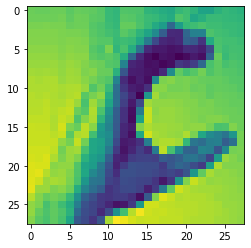

In [29]:
instance = 81 
a = display_df[instance].reshape(1,-1)
a_image = a.reshape((28,28))

a1 = x_test[instance].reshape(1,-1)
pred_a = clf.predict(a1)
im = Image.fromarray((a_image.astype(np.uint8)))

imshow(np.asarray(a_image))
print("--------------")
print("The model predicted this instance as label", pred[instance])
print("--------------")
print("Where its label is", y_test.iloc[instance])

In [18]:
x_test[1]

array([-0.0392234 , -1.64823847, -0.65144997,  1.20619228, -1.68581645,
        0.06037758, -0.49309615, -1.56860285,  1.3901019 ,  1.10975036,
       -0.21566497,  1.47825759, -0.01477514,  0.38056549, -0.05222919,
       -0.14721064, -0.59952072, -0.32814961,  0.62114819, -0.11193795])

## Confusion Matrix and Different Accuracy Parameters

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test.to_numpy(), pred))